# DeepMISSS : Deep Medical Image Supervised Semantic Segmentation 

## This is a simple proposal to make it easier for you to access and use the data

### Database Dscription

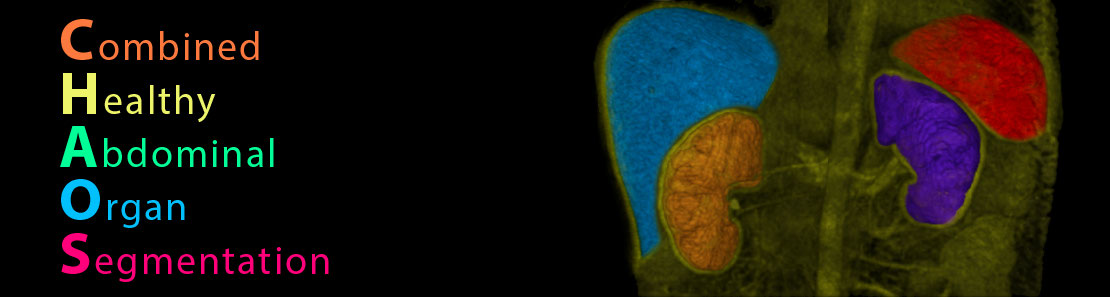

In [58]:

organ_label    = 80 # 80(liver), 160(right kidney), 240(left kidney) or 255(spleen) (informations given with data description)

dataset = 'chaos'
if organ_label == 80:
    organ = 'liver'
elif organ_label == 160:
    organ = 'rkidney'
elif organ_label == 240:
    organ = 'lkidney'
elif organ_label == 255:
    organ = 'spleen'

### Libraries

In [59]:
import os
from skimage import io
from skimage.exposure import rescale_intensity
import numpy as np
import distutils.dir_util
import nibabel

### Initilization

In [60]:
# Dataabase is splitted into Train and test manulally
# Todo : provide a new split method

train_ids_     = [1,2,3,5,8,10,13,15,19,21]
test_ids_      = [20,22,31,32,33,34,36,37,38,39]
modality       = 'T1DUALin' # T1DUALin, T1DUALout, T2SPIR

### Paths

In [61]:
data_folder    = 'C:/Users/ikhouaja/Desktop/MyProjects/SuperCNN/DATA/chaos/MR-dataset/'
struc_folder   = 'C:/Users/ikhouaja/Desktop/MyProjects/SuperCNN/DATA/chaos/branch_structures/'
if not os.path.exists(struc_folder):
    os.makedirs(struc_folder)

output_root    = 'C:/Users/ikhouaja/Desktop/MyProjects/SuperCNN/NewResults_main/'
if not os.path.exists(output_root):
    os.makedirs(output_root)


In [62]:
#Organ Selction

dataset = 'chaos'
if organ_label == 80:
    organ = 'liver'
elif organ_label == 160:
    organ = 'rkidney'
elif organ_label == 240:
    organ = 'lkidney'
elif organ_label == 255:
    organ = 'spleen'

In [63]:
# Update output folder

output_root += 'superCNN/superCNN-'+dataset+'-New-'+modality+'-'+organ
 
output_root += '/'
distutils.dir_util.mkpath(output_root) # create folder

[]

In [64]:
# validated
def read_examination(data_folder, exam_id, modality):
    path = data_folder+'%02d-'%(exam_id)
    if modality == 'T1DUALin':
        img = nibabel.load(path+'T1DUALin-src.nii.gz')
    elif modality == 'T1DUALout':
        img = nibabel.load(path+'T1DUALout-src.nii.gz')
    elif modality == 'T2SPIR':
        img = nibabel.load(path+'T2SPIR-src.nii.gz')        
    mask = None
    if modality == 'T1DUALin' or modality == 'T1DUALout':
        if os.path.isfile(path+'T1DUAL-mask.nii.gz'): # if mask exists
            mask = nibabel.load(path+'T1DUAL-mask.nii.gz')
    elif modality ==  'T2SPIR':
        if os.path.isfile(path+'T2SPIR-mask.nii.gz'): # if mask exists
            mask = nibabel.load(path+'T2SPIR-mask.nii.gz')        
    return img, mask

In [65]:
# validated
def write_train_test_exam_ids(train_ids, test_ids, output):
    text_file = open(output+'info.txt', 'w') 
    text_file.write('train_ids : '+str(train_ids)+'\n')
    text_file.write('test_ids : '+str(test_ids)+'\n')
    text_file.close()
    
write_train_test_exam_ids(train_ids_, test_ids_, output_root) # write train/test exam ids

In [66]:
## step I - training data collection
train_imgs, train_masks, train_ids = [], [], []
for exam_id in train_ids_:
    img_, mask_ =read_examination(data_folder, exam_id, modality)
    print('training exam ' + str(exam_id) + ' collected with shape ' + str(img_.get_fdata().shape))
    
    ##
    zs = np.unique(np.where(mask_.get_fdata()==organ_label)[2]) # ids of axial slices containing the organ.
    #This instruction allows to avoid slices that not contain the designated organ
    ##

    for z in zs:
        img = (np.array(img_.get_fdata()[:,:,z], dtype=float)).astype(np.uint8)
        ## ==>from Nifti type (slices) to dtype=uint8
       
        #img = rescale_intensity(img, in_range=(np.min(img), np.max(img)), out_range=(0,1)) 
        
        mask = mask_.get_fdata()[:,:,z] # corresponding img to its mask
        train_imgs.append(img) #list of imgs
        
        train_masks.append(mask) #list of masks
      
        train_ids.append('exam-%0*d'%(2,exam_id)+'-slice-%0*d'%(2,z)) #list of ids     


training exam 1 collected with shape (256, 256, 35)
training exam 2 collected with shape (288, 288, 26)
training exam 3 collected with shape (288, 288, 30)
training exam 5 collected with shape (256, 256, 30)
training exam 8 collected with shape (288, 288, 36)
training exam 10 collected with shape (256, 256, 50)
training exam 13 collected with shape (288, 288, 30)
training exam 15 collected with shape (256, 256, 26)
training exam 19 collected with shape (288, 288, 30)
training exam 21 collected with shape (256, 256, 34)


In [72]:
## step II - test data collection
test_imgs, test_masks, test_ids = [], [], []
test_visible_organ = [] # indicate if test axial slice contains organ # NEW!
for exam_id in test_ids_:
    img_, mask_ =read_examination(data_folder, exam_id, modality)
    print('test exam ' + str(exam_id) + ' collected with shape ' + str(img_.get_fdata().shape))
    zs_organ = np.unique(np.where(mask_.get_fdata()==organ_label)[2]) # ids of axial slices containing the organ 
    zs = range(img_.get_fdata().shape[2]) # all axial slice ids  !
    for z in zs:
        img = (np.array(img_.get_fdata()[:,:,z], dtype=float)).astype('uint8')
        #img = rescale_intensity(img, in_range=(np.min(img),np.max(img)), out_range=(0,1)) 
        mask = mask_.get_fdata()[:,:,z]
        test_imgs.append(img)
        test_masks.append(mask)  
        test_ids.append('exam-%0*d'%(2,exam_id)+'-slice-%0*d'%(2,z))
        test_visible_organ.append(0) 
        if z in zs_organ: 
            test_visible_organ[-1] = 1

test exam 20 collected with shape (288, 288, 26)
test exam 22 collected with shape (256, 256, 35)
test exam 31 collected with shape (256, 256, 30)
test exam 32 collected with shape (256, 256, 33)
test exam 33 collected with shape (256, 256, 33)
test exam 34 collected with shape (256, 256, 35)
test exam 36 collected with shape (256, 256, 38)
test exam 37 collected with shape (256, 256, 30)
test exam 38 collected with shape (288, 288, 34)
test exam 39 collected with shape (256, 256, 26)
